In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import kneighbors_graph

data = pd.read_csv('common/data/earthquake_data.csv')
R = 63710

lat_rad = np.radians(data['latitude'])
lon_rad = np.radians(data['longitude'])
r = R - data['depth']

data['x'] = r * np.cos(lat_rad) * np.cos(lon_rad)
data['y'] = r * np.cos(lat_rad) * np.sin(lon_rad)
data['z'] = r * np.sin(lat_rad)
X = data[['x','y','z']].values

adj_matrix = kneighbors_graph(X, n_neighbors = 7, mode='connectivity', include_self=False)


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_spatial = scaler.fit_transform(data[['x', 'y', 'z']])
X_mag = scaler.fit_transform(data[['mag']])

# Increase alpha to make clusters geographically tighter
alpha = 2.0 
X_combined = np.hstack([X_spatial * alpha, X_mag])

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_combined)

data.to_csv('results/earthquake_clusters_spatially_constraied_kmeans.csv', index = False)

In [3]:
data['cluster'].value_counts()

cluster
0    205
2     14
1      5
Name: count, dtype: int64

In [4]:
from common.module_functions import *

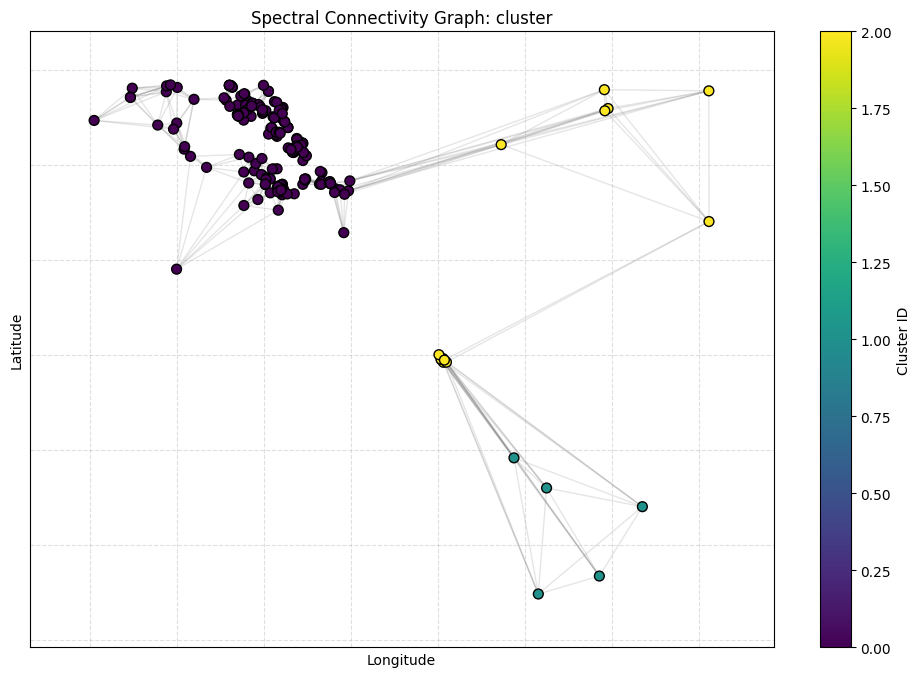

In [5]:
visualize_graph_connectivity(data, adj_matrix, 'cluster')

In [6]:
visualize_3d(data, 'cluster')

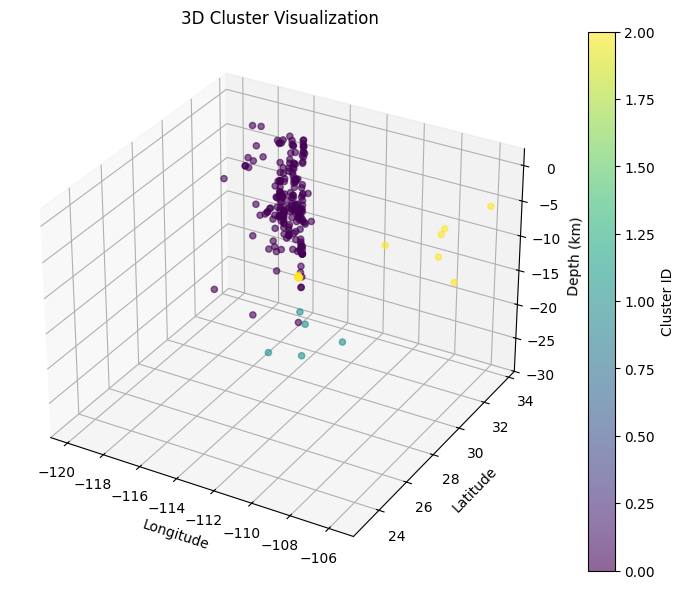

In [7]:
visualize_3d_static(data, cluster_name='cluster')


In [9]:
calculate_sillouette_score(X_combined, 'cluster', data)

Silhouette Score: 0.7208434122062466


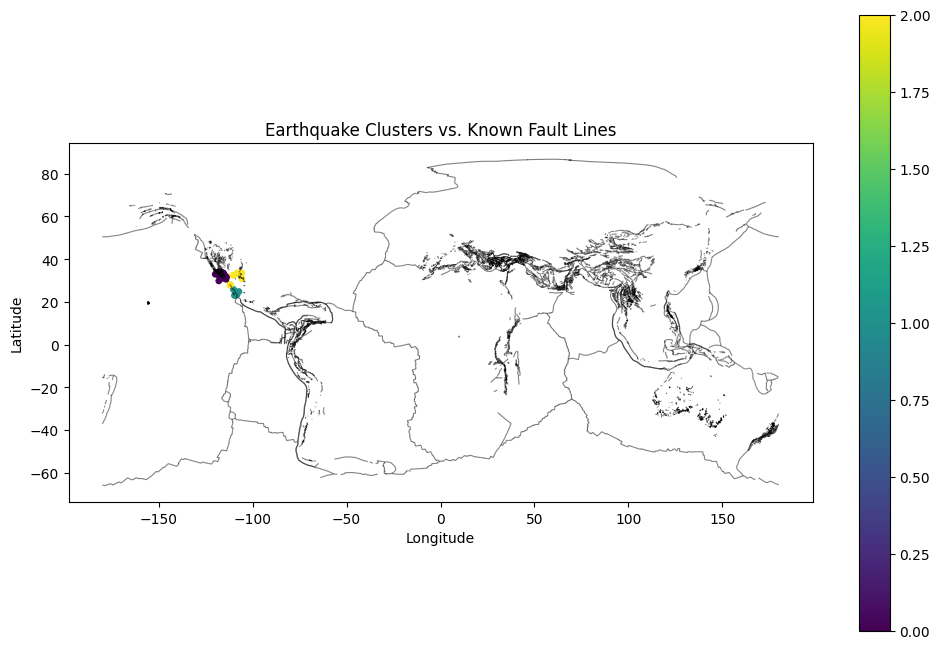

In [10]:
visualize_clusters_on_known_fault_lines(data, crs = "EPSG:4326", cluster_column='cluster')

In [11]:
data.cluster

0      0
1      0
2      0
3      0
4      0
      ..
219    0
220    0
221    0
222    0
223    0
Name: cluster, Length: 224, dtype: int32